In [1]:
format(Sys.time(), "%a %b %d %X %Y")
reviews <- read.csv("yelp_academic_dataset_review.csv")
format(Sys.time(), "%a %b %d %X %Y")

[1] "Tue Oct 17 2:39:35 PM 2017"

[1] "Tue Oct 17 2:42:01 PM 2017"

In [2]:
summary(reviews)

     funny                            user_id       
 Min.   :  0.0000   CxDOIDnH8gp9KXzpBHJYXw:   3327  
 1st Qu.:  0.0000   bLbSNkLggFnqwNNzzq-Ijw:   1795  
 Median :  0.0000   PKEzKWv_FktMm2mGPjwd0Q:   1509  
 Mean   :  0.4195   QJI9OSEn6ujRCtrX06vs1w:   1316  
 3rd Qu.:  0.0000   DK57YibC5ShBmqQl97CKog:   1266  
 Max.   :632.0000   d_TBs6J3twMy9GChqUEXkg:   1091  
                    (Other)               :4142846  
                  review_id                       business_id     
 ----X0BIDP9tA49U3RvdSQ:      1   4JNXUYY8wbaaDmk3BPzlWw:   6414  
 ---0hl58W-sjVTKi5LghGw:      1   RESDUcs7fIiihp38-d6_6g:   5715  
 ---3OXpexMp0oAg77xWfYA:      1   K7lWdNUhCbcnEvI0NhGewg:   5216  
 ---65iIIGzHj96QnOh89EQ:      1   cYwJA2A6I12KNkm2rtXd5g:   5116  
 ---7WhU-FtzSUOje87Y4uw:      1   DkYS3arLOhA8si5uUEmHOw:   4655  
 ---94vtJ_5o_nikEs6hUjg:      1   hihud--QRriCYZw1zZvW4g:   4120  
 (Other)               :4153144   (Other)               :4121914  
     stars               date           

In [3]:
head(reviews)

funny,user_id,review_id,business_id,stars,date,useful,type,cool
0,KpkOkG6RIf4Ra25Lhhxf1A,NxL8SIC5yqOdnlXCg18IBg,2aFiy99vNLklCx3T_tGS9A,5,2011-10-10,0,review,0
0,bQ7fQq1otn9hKX-gXRsrgA,pXbbIgOXvLuTi_SPs1hQEQ,2aFiy99vNLklCx3T_tGS9A,5,2010-12-29,1,review,0
0,r1NUhdNmL6yU9Bn-Yx6FTw,wslW2Lu4NYylb1jEapAGsw,2aFiy99vNLklCx3T_tGS9A,5,2011-04-29,0,review,0
0,aW3ix1KNZAvoM8q-WghA3Q,GP6YEearUWrzPtQYSF1vVg,2LfIuF3_sX6uwe-IR-P0jQ,5,2014-07-14,0,review,1
0,YOo-Cip8HqvKp_p9nEGphw,25RlYGq2s5qShi-pn3ufVA,2LfIuF3_sX6uwe-IR-P0jQ,4,2014-01-15,0,review,0
0,bgl3j8yJcRO-00NkUYsXGQ,Uf1Ki1yyH_JDKhLvn2e4FQ,2LfIuF3_sX6uwe-IR-P0jQ,5,2013-04-28,2,review,1


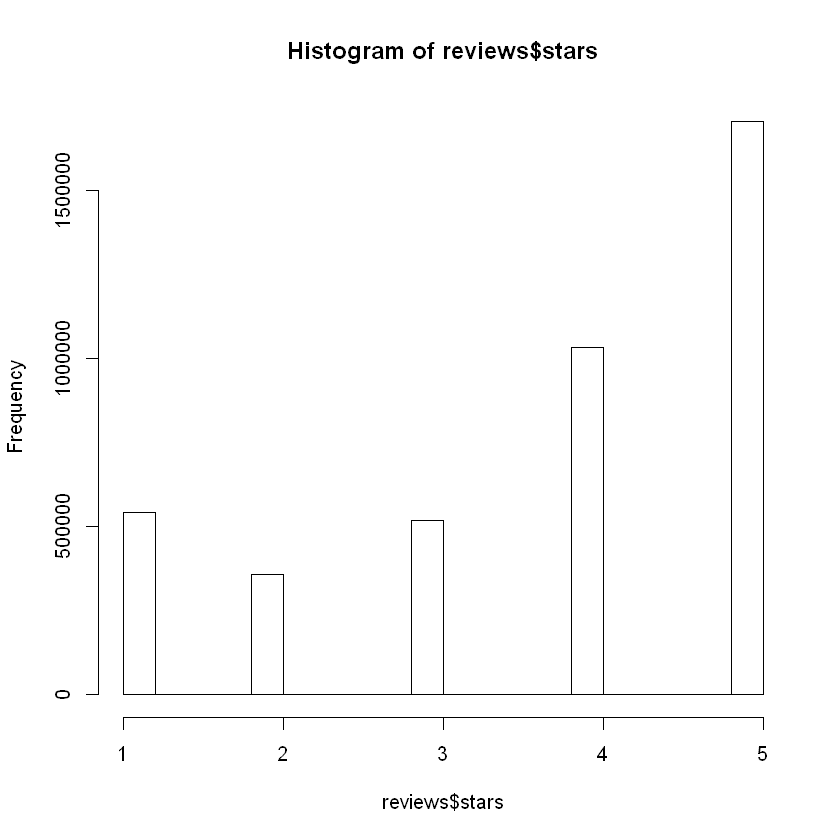

In [4]:
hist(reviews$stars)

In [5]:
#businesses with most 5 star ratings
install.packages("sqldf", repos='http://cran.us.r-project.org')
library(sqldf)
five_stars = sqldf("select business_id, count(*) from reviews where stars = 5 group by business_id order by 2 desc")
head(five_stars)

also installing the dependencies 'blob', 'memoise', 'gsubfn', 'proto', 'RSQLite', 'DBI'



package 'blob' successfully unpacked and MD5 sums checked
package 'memoise' successfully unpacked and MD5 sums checked
package 'gsubfn' successfully unpacked and MD5 sums checked
package 'proto' successfully unpacked and MD5 sums checked
package 'RSQLite' successfully unpacked and MD5 sums checked
package 'DBI' successfully unpacked and MD5 sums checked
package 'sqldf' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\prasadr\AppData\Local\Temp\RtmpuUndHc\downloaded_packages


Warning message:
"package 'sqldf' was built under R version 3.4.2"Loading required package: gsubfn
Warning message:
"package 'gsubfn' was built under R version 3.4.2"Loading required package: proto
Warning message:
"package 'proto' was built under R version 3.4.2"Could not load tcltk.  Will use slower R code instead.
Loading required package: RSQLite


business_id,count(*)
hihud--QRriCYZw1zZvW4g,3115
4JNXUYY8wbaaDmk3BPzlWw,2774
DkYS3arLOhA8si5uUEmHOw,2330
RESDUcs7fIiihp38-d6_6g,2230
cYwJA2A6I12KNkm2rtXd5g,2026
KskYqH1Bi7Z_61pH6Om8pg,1860


In [6]:
#which places have most ratings
library(sqldf)
most_ratings = sqldf("select business_id, count(*) from reviews group by business_id order by 2 desc")
head(most_ratings)

business_id,count(*)
4JNXUYY8wbaaDmk3BPzlWw,6414
RESDUcs7fIiihp38-d6_6g,5715
K7lWdNUhCbcnEvI0NhGewg,5216
cYwJA2A6I12KNkm2rtXd5g,5116
DkYS3arLOhA8si5uUEmHOw,4655
hihud--QRriCYZw1zZvW4g,4120


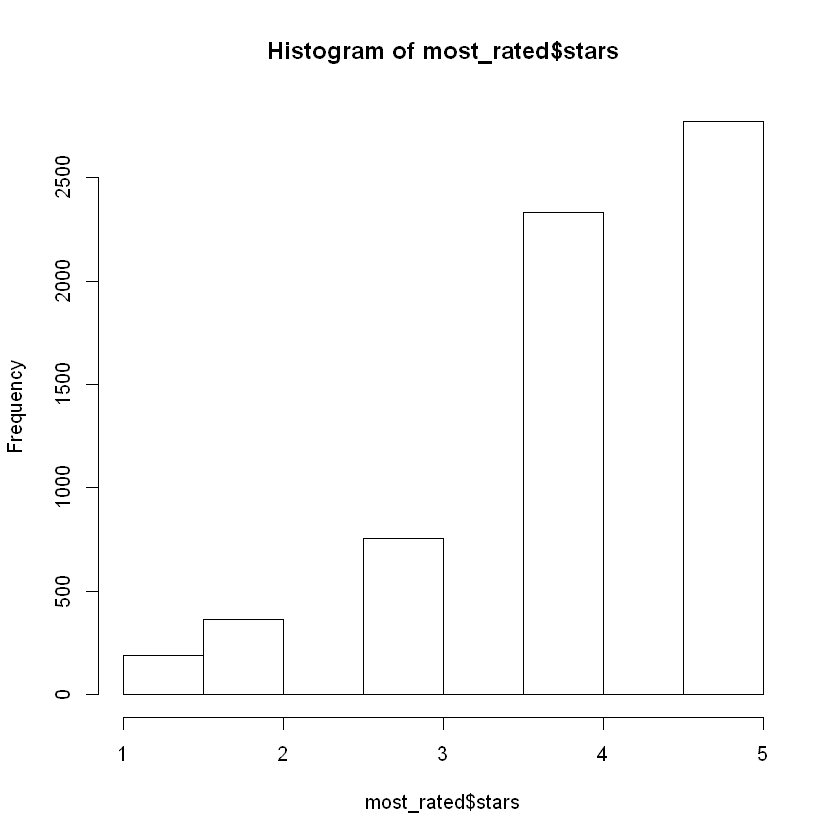

In [7]:
# range of ratings for business with most ratings
library(sqldf)
most_rated = sqldf("select * from reviews where business_id = '4JNXUYY8wbaaDmk3BPzlWw' ")
hist(most_rated$stars)

In [8]:
# correlation number of reviews and number of stars
library(sqldf)
reviews_stars = sqldf("select stars,count(*) as reviews from reviews group by stars")
reviews_stars
cor(reviews_stars)

stars,reviews
1,540377
2,358550
3,517369
4,1032654
5,1704200


,stars,reviews
stars,1.0000000,0.8632361
reviews,0.8632361,1.0000000


business_id,rating
--WsruI0IGEoeRmkErU5Gg,5
--cgVkbWTiga3OYTkymKqA,5
--lpHMVmkCuji0ZrpHtXEA,5
--sdH6tFAdEs7j4Msr7nPA,5
-000aQFeK6tqVLndf7xORg,5
-03HVYxkeYWaafEpNJo1SA,5


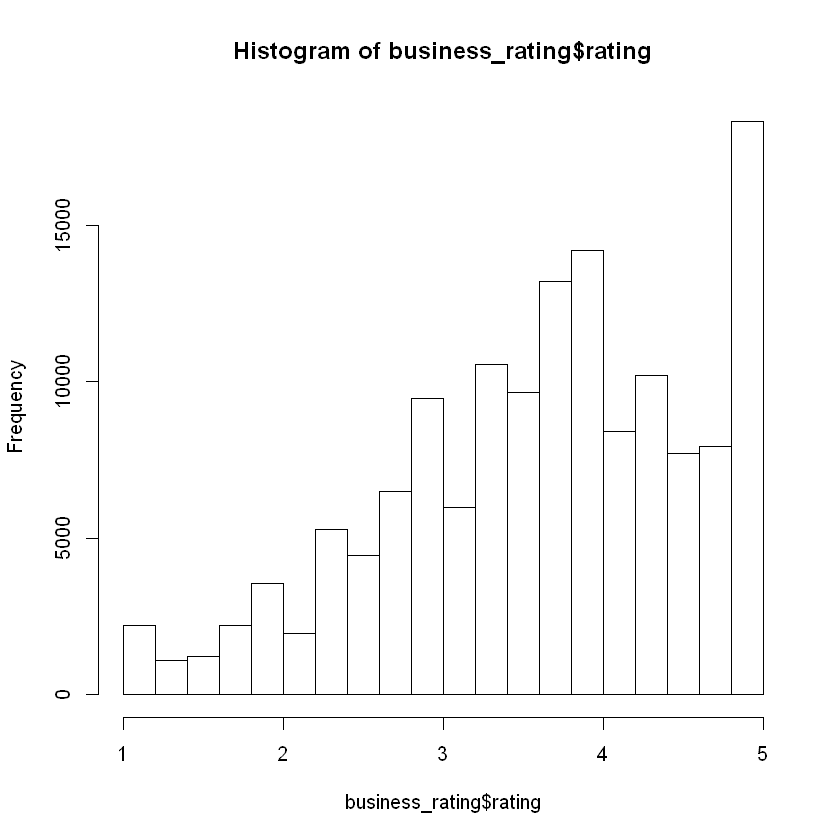

In [9]:
#correlation business and rating
library(sqldf)
business_rating = sqldf("select business_id, avg(stars) as rating from reviews group by business_id order by 2 desc")
head(business_rating)
hist(business_rating$rating)

In [10]:
model <- lm(stars ~ funny + useful + cool, data=reviews)
summary(model)



Call:
lm(formula = stars ~ funny + useful + cool, data = reviews)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.591  -0.773   0.227   1.227 101.763 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.7732752  0.0007266  5193.0   <2e-16 ***
funny       -0.1505152  0.0007393  -203.6   <2e-16 ***
useful      -0.1528960  0.0004952  -308.8   <2e-16 ***
cool         0.3169540  0.0007418   427.3   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.372 on 4153146 degrees of freedom
Multiple R-squared:  0.04644,	Adjusted R-squared:  0.04643 
F-statistic: 6.741e+04 on 3 and 4153146 DF,  p-value: < 2.2e-16
